## 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## 1. Get data with a previosly made function

In [2]:
from preparation import prepare_data

PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df = prepare_data(PATH)
df.head(5)

,video_title,channel_name,time
0,Alvan & Ahez - Fulenn - LIVE - France 🇫🇷 - Gra...,Eurovision Song Contest,2022-07-11 19:32:31.801000+03:00
1,Monika Liu - Sentimentai - LIVE - Lithuania 🇱🇹...,Eurovision Song Contest,2022-07-11 19:28:54.894000+03:00
2,Ochman - River - LIVE - Poland 🇵🇱 - Grand Fina...,Eurovision Song Contest,2022-07-11 19:26:22.578000+03:00
3,Zdob şi Zdub & Advahov Brothers - Trenulețul -...,Eurovision Song Contest,2022-07-11 19:22:41.498000+03:00
4,"""In Honolulu"" - German Sailor Song",Ingen,2022-07-11 19:06:04.511000+03:00


## 2. Explore

#### 2.1 Count how many videos you clicked per channel and plot the most watched channels

In [3]:
counts = df["channel_name"].value_counts()
counts

Eurovision Song Contest     181
STERNENKO                   171
Adam Something               75
Beau of the Fifth Column     66
Sky News                     64
                           ... 
Om TV                         1
ANNEKSIYA NET                 1
ACG                           1
The Mighty Jingles            1
АрміяInform                   1
Name: channel_name, Length: 1039, dtype: Int64

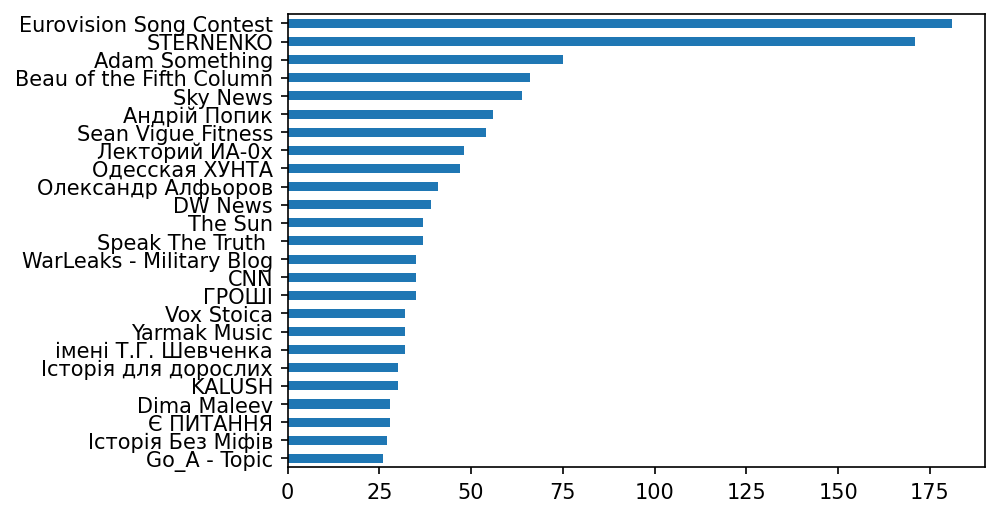

In [11]:
# Plot first n-rows
plt.rcParams['figure.dpi'] = 150 # make your graph bigger

ax = counts.iloc[:25].plot(kind="barh")
ax.invert_yaxis()

#### 2.2 Count on how many videos you clicked per hour

<AxesSubplot:>

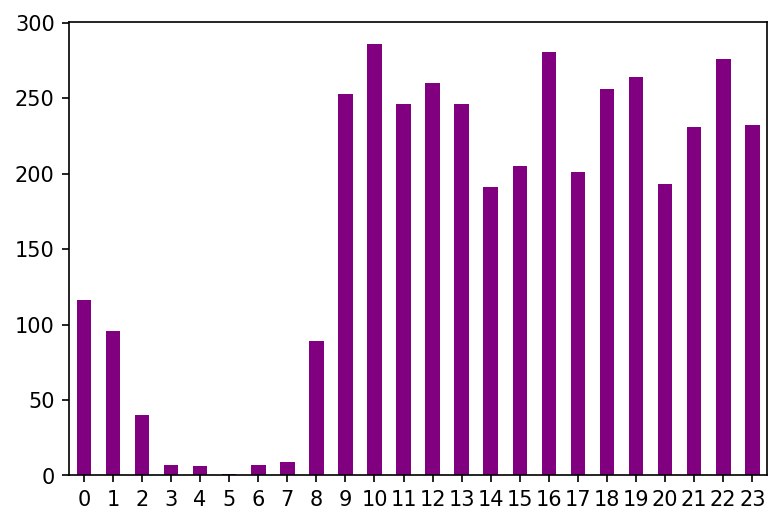

In [12]:
hours = pd.DatetimeIndex(df['time']).hour # get hours from datetime
hours = hours.value_counts().sort_index() # count on how many videos you clicked and sort hours from 0 to 23
hours.plot.bar(color="purple", rot=0)

#### 2.3 Discover at what hour you usually watch a particular channel 

In [6]:
df


,video_title,channel_name,time
0,Alvan & Ahez - Fulenn - LIVE - France 🇫🇷 - Gra...,Eurovision Song Contest,2022-07-11 19:32:31.801000+03:00
1,Monika Liu - Sentimentai - LIVE - Lithuania 🇱🇹...,Eurovision Song Contest,2022-07-11 19:28:54.894000+03:00
2,Ochman - River - LIVE - Poland 🇵🇱 - Grand Fina...,Eurovision Song Contest,2022-07-11 19:26:22.578000+03:00
3,Zdob şi Zdub & Advahov Brothers - Trenulețul -...,Eurovision Song Contest,2022-07-11 19:22:41.498000+03:00
4,"""In Honolulu"" - German Sailor Song",Ingen,2022-07-11 19:06:04.511000+03:00
...,...,...,...
3987,We Are Number One - Lazy Town [Saxophone Cover],Daniele Vitale Sax,2022-04-06 13:40:30.876000+03:00
3988,Учасники «Чорнобаївського серіалу» боронять Ми...,АрміяInform,2022-04-06 13:33:50.430000+03:00
3989,Звірства росіян у Бородянці. Катування мирних ...,STERNENKO,2022-04-06 13:03:25.129000+03:00
3990,"ЧОМУ НЕ БУВАЄ ""ХАРОШИХ РУССКИХ""?",Загін Кіноманів,2022-04-06 12:36:08.058000+03:00


In [7]:
day_hs=[h for h in range(0, 24)]
day_hs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

pandas.core.series.Series

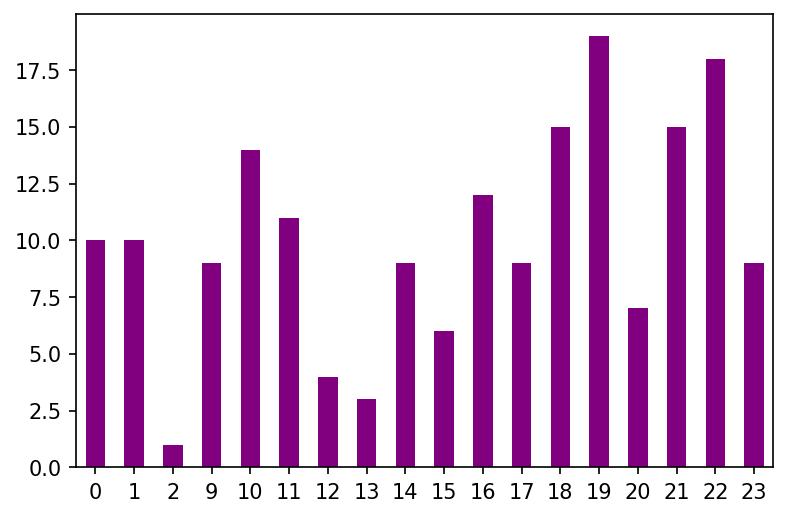

In [13]:
channel_name_to_look = "Eurovision Song Contest"

df_for_channel = df.loc[df["channel_name"] == channel_name_to_look]
channel_watch_hs = pd.DatetimeIndex(df_for_channel['time']).hour # get hours from datetime
channel_watch_hs = channel_watch_hs.value_counts().sort_index() # count on how many videos you clicked and sort hours from 0 to 23
channel_watch_hs.plot.bar(color="purple", rot=0)
type(channel_watch_hs)

In [15]:
type(channel_watch_hs)
channel_watch_hs
series = pd.Series(channel_watch_hs, day_hs)
series = series.fillna(0) # change NaN to 0
series = series.astype(int)
series


0     10
1     10
2      1
3      0
4      0
5      0
6      0
7      0
8      0
9      9
10    14
11    11
12     4
13     3
14     9
15     6
16    12
17     9
18    15
19    19
20     7
21    15
22    18
23     9
Name: time, dtype: int32

<AxesSubplot:>

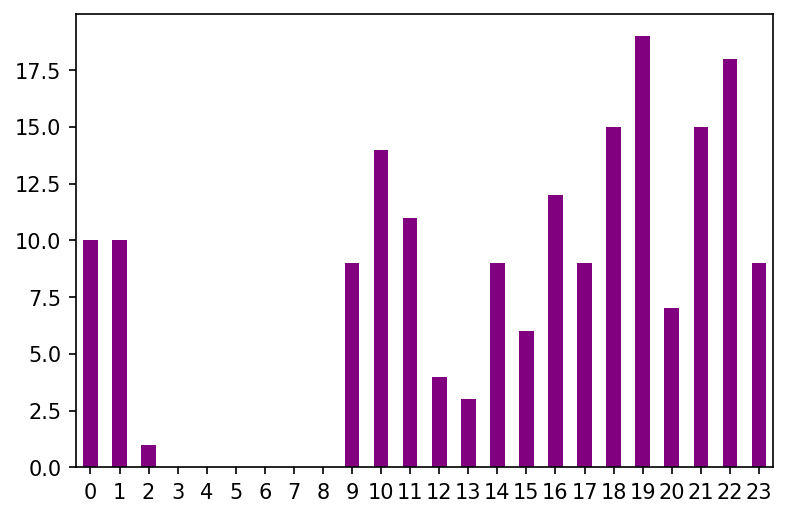

In [14]:
series.plot.bar(color="purple", rot=0)